<a href="https://colab.research.google.com/github/nadiagonzzalez/pai-uab-2024/blob/main/p3_GNSS_IMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOCALIZATION SYSTEMS – Positioning with Inertial Measurement Units (Practice 3)

To run this practice using Google's collab, follow this link [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgfernan/gsl_uab/blob/main/p3_GNSS_IMU.ipynb)

In this practice, we will focus on the fundamentals of positioning based on Inertial Measurement Units (IMU). We will compute the position by integrating the acceleration given by the IMU sensor.


In [30]:
# Add required libraries
import pandas as pd
import matplotlib.pyplot as plt

Download the necessary files for this practice

In [31]:
# Download necessary files
import requests

for file_name in ['data.csv', 'trajectory.csv']:
  url = f"https://github.com/mgfernan/gsl_uab/raw/main/data/{file_name}"

  response = requests.get(url)
  if response.status_code == 200:
      with open(file_name, 'wb') as file:
          file.write(response.content)
      print(f"File '{file_name}' downloaded successfully.")
  else:
      print(f"Failed to download the file. Status code: {response.status_code}")

File 'data.csv' downloaded successfully.
File 'trajectory.csv' downloaded successfully.


## Short tutorial on `pandas`

Pandas is a powerful Python library for data manipulation and analysis. It provides data structures and functions needed to work with structured data seamlessly. In this tutorial, we'll cover some fundamental aspects of Pandas.

### Creating a DataFrame

A DataFrame is a two-dimensional labeled data structure with columns that can be of different types. You can create a DataFrame using various methods, such as from dictionaries, lists, or reading data from files.

In [13]:
# Create a DataFrame from a dictionary
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22


### Reading Data from a CSV File

Pandas makes it easy to read data from various file formats, such as CSV, Excel, SQL databases, etc. Here's how you can read data from a CSV file.

**Note**: You will have to upload the [`data.csv` file](https://raw.githubusercontent.com/mgfernan/gsl_uab/main/data/data.csv) from the Github repository to the Colab workspace  

In [14]:
# Read data from a CSV file
file_path = 'data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22
3    David   28
4      Eve   24


### Basic DataFrame Operations

Pandas offers numerous functions to manipulate and analyze data:

In [15]:
# Selecting a column
ages = df['Age']
print(ages)

0    25
1    30
2    22
3    28
4    24
Name: Age, dtype: int64


In [16]:
# Filtering rows
young_people = df[df['Age'] < 30]
print(young_people)

      Name  Age
0    Alice   25
2  Charlie   22
3    David   28
4      Eve   24


In [17]:
# Adding a new column
df['Gender'] = ['F', 'M', 'M', 'M', 'F']
print(df)

      Name  Age Gender
0    Alice   25      F
1      Bob   30      M
2  Charlie   22      M
3    David   28      M
4      Eve   24      F


In [19]:
# Grouping and aggregation
grouped = df.groupby('Gender').mean(numeric_only=True)
print(grouped)

              Age
Gender           
F       24.500000
M       26.666667


In [4]:
# Sorting
sorted_df = df.sort_values(by='Age', ascending=False)
print(sorted_df)

NameError: name 'df' is not defined

### Data Visualization

Albeit Pandas also provides basic plotting capabilities using the `plot()` function, you can also use `matplotlib` for this
purpose, which will give you more flexibility

<BarContainer object of 5 artists>

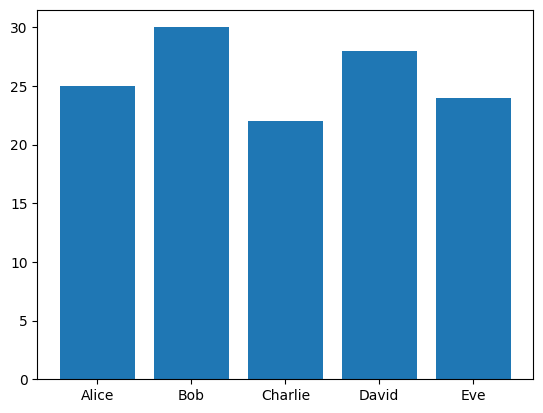

In [20]:
# Plotting a bar chart
plt.bar(df['Name'], df['Age'])

## Practice exercises

**Exercise 1: data load**

**Using pandas, read the file `trajectory.csv` that contains the position and acceleration into a `DataFrame` structure**

![Trajectory](https://github.com/mgfernan/gsl_uab/blob/main/assets/trajectory.png?raw=1)

**Tip**: Use the Pandas `read_csv` method

Answer the following questions:

1. What are the magnitudes (columns) contained in the `DataFrame`? Describe them briefly in one short sentence.
1. How many epochs does the file contain?
1. What is the sampling rate of the data file?

In [32]:
# Read data from a CSV file
file_path = 'trajectory.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   time  position_east(m)  position_north(m)  acceleration_east(m/s2)  \
0   0.0        -22.431645          20.812091                -1.127633   
1   1.0        -45.752834          40.442699                -0.889543   
2   2.0        -69.814698          59.005770                -0.740675   
3   3.0        -94.793545          76.241631                -0.916983   
4   4.0       -120.831741          91.897645                -1.059350   

   acceleration_north(m/s2)  
0                 -1.308569  
1                 -1.181482  
2                 -1.067538  
3                 -1.327209  
4                 -1.579847  


**Exercise 2: plotting**

**Use matplotlib to plot the horizontal (i.e. North vs East) trajectory**

**Tip:** Use the `plt.plot` method

Answer the following questions:

1. What do you see in the plot?
1. How long is the trajectory in the East component, approximately? And in the North component?



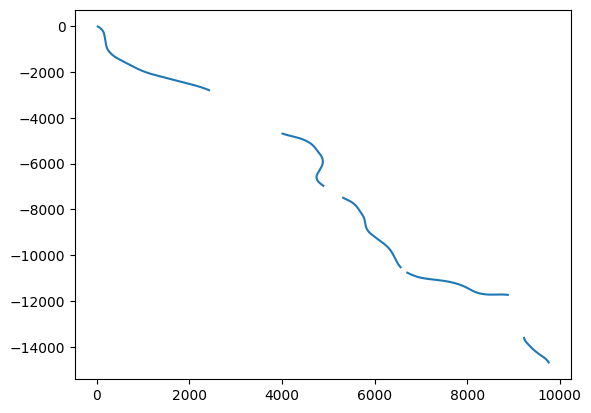

In [33]:
#Plot North vs East Trajectory
plt.plot(df['position_north(m)'],df['position_east(m)'])


**Exercise 3: Availability and Continuity**

Answer the following questions:

1. Is the trajectory **available** all the time? If not, what are the typical causes for lack of availability in a positioning system based on GNSS? How can it be solved?
1. Compute the **availability** (in percentage) of the position? Tip: you will need to check the number of positions (either East or North) that are valid (i.e. not NaN) using the pandas method `isna()`.
1. Plot the time difference for the valid points. Can this be related to the trajectory plot? How many data gaps do you have in the trajectory? which sizes approximately? Tip: compute the epoch difference for the valid points

In [34]:
# Compute the number of valid (non-NaN) entries in the East position column
valid_positions = df['position_east(m)'].isna().sum()

# Compute the total number of entries
total_positions = len(df)

# Calculate availability as a percentage
availability = 100 * (1 - valid_positions / total_positions)

# Print the result
print(f"Position availability: {availability:.2f}%")

Position availability: 70.60%


In [35]:
import matplotlib.pyplot as plt

# Step 1: Filter valid points and sort
valid_df = df[['time', 'position_east(m)', 'position_north(m)']].dropna()
valid_df = valid_df.sort_values(by='time')

# Step 2: Compute time differences (already in seconds)
time_diff = valid_df['time'].diff().fillna(0)

# Step 4: Detect gaps above 10 milliseconds (0.01 seconds)
gap_threshold = 0.01
gap_mask = time_diff > gap_threshold
gap_sizes = time_diff[gap_mask]

# Output results
print(f"Number of data gaps: {gap_mask.sum()}")
print("Approximate gap sizes (in seconds):")
print(gap_sizes.round(4).values)

Number of data gaps: 352
Approximate gap sizes (in seconds):
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. 62.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. 17.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

**Exercise 4: Trajectory reconstruction**

In this exercise we will use the acceleration to reconstruct the position at the missing parts, just in the same way as the IMU help GNSS in parts of the route where GNSS is not available.

For this exercise you will need the following method

In [36]:
import math

def integrate_trajectory(epochs, positions, accelerations):

    dts = epochs.diff()

    out = []
    for dt, pos, accel in zip(dts, positions, accelerations):

        if math.isnan(pos):
            prev_velocity = (out[-1] - out[-2]) / dt
            velocity = prev_velocity + accel * dt
            position = position + velocity * dt

        else:
            position = pos

        out.append(position)

    return out


Available columns: Index(['time', 'position_east(m)', 'position_north(m)',
       'acceleration_east(m/s2)', 'acceleration_north(m/s2)'],
      dtype='object')


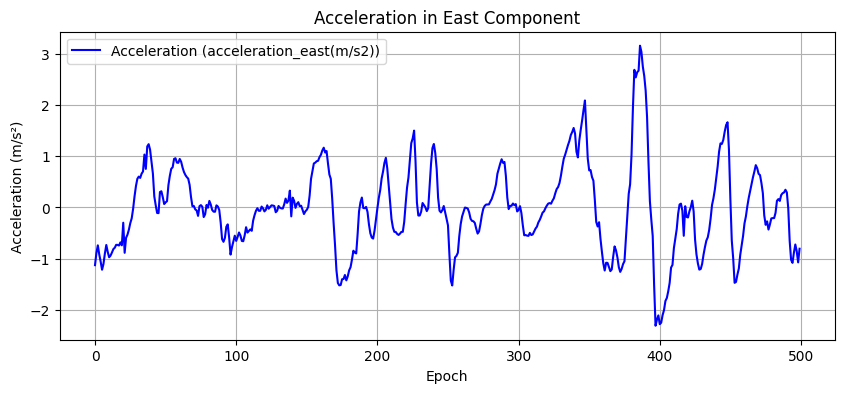

Total samples: 500
Missing samples: 0
Availability of acceleration_east(m/s2): 100.00%


In [45]:
# Load the data
df_accel = pd.read_csv('trajectory.csv')

# Print available columns to confirm structure
print("Available columns:", df_accel.columns)

# Use the actual acceleration column name
acc_column = 'acceleration_east(m/s2)'  # Change to 'acceleration_north(m/s2)' if needed

if acc_column in df_accel.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df_accel[acc_column], label=f'Acceleration ({acc_column})', color='blue')
    plt.title('Acceleration in East Component')
    plt.xlabel('Epoch')
    plt.ylabel('Acceleration (m/s²)')
    plt.grid(True)
    plt.legend()
    plt.show()

    total = len(df_accel)
    valid = df_accel[acc_column].notna().sum()
    missing = df_accel[acc_column].isna().sum()
    availability = (valid / total) * 100

    print(f"Total samples: {total}")
    print(f"Missing samples: {missing}")
    print(f"Availability of {acc_column}: {availability:.2f}%")
else:
    print(f"Column '{acc_column}' not found.")

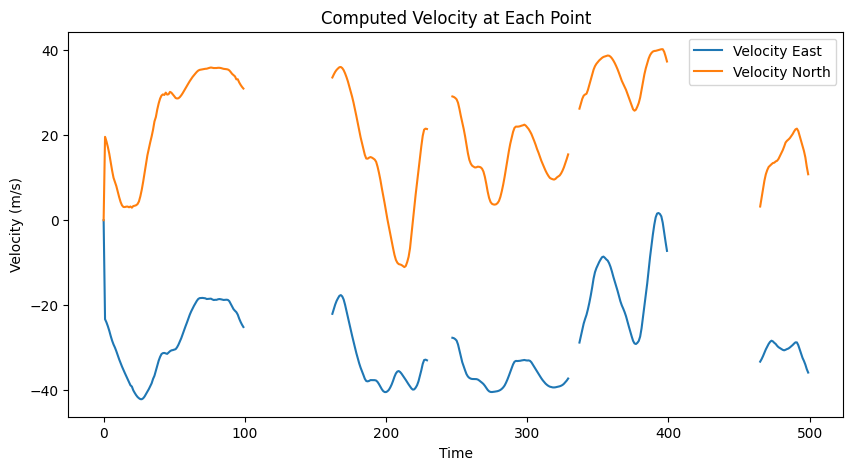

In [55]:

# Load the data
df = pd.read_csv('trajectory.csv')

# Use correct column names
epochs = df['time']
east = df['position_east(m)']
north = df['position_north(m)']

# Compute time differences
dt = np.mean(np.diff(epochs))

# Compute velocities by finite difference (only where position is valid)
velocity_east = np.zeros_like(east)
velocity_north = np.zeros_like(north)

for i in range(1, len(east)):
    if not np.isnan(east[i]) and not np.isnan(east[i-1]):
        velocity_east[i] = (east[i] - east[i-1]) / dt
    else:
        velocity_east[i] = np.nan

    if not np.isnan(north[i]) and not np.isnan(north[i-1]):
        velocity_north[i] = (north[i] - north[i-1]) / dt
    else:
        velocity_north[i] = np.nan

# Plot velocities
plt.figure(figsize=(10, 5))
plt.plot(epochs, velocity_east, label='Velocity East')
plt.plot(epochs, velocity_north, label='Velocity North')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.title('Computed Velocity at Each Point')
plt.show()

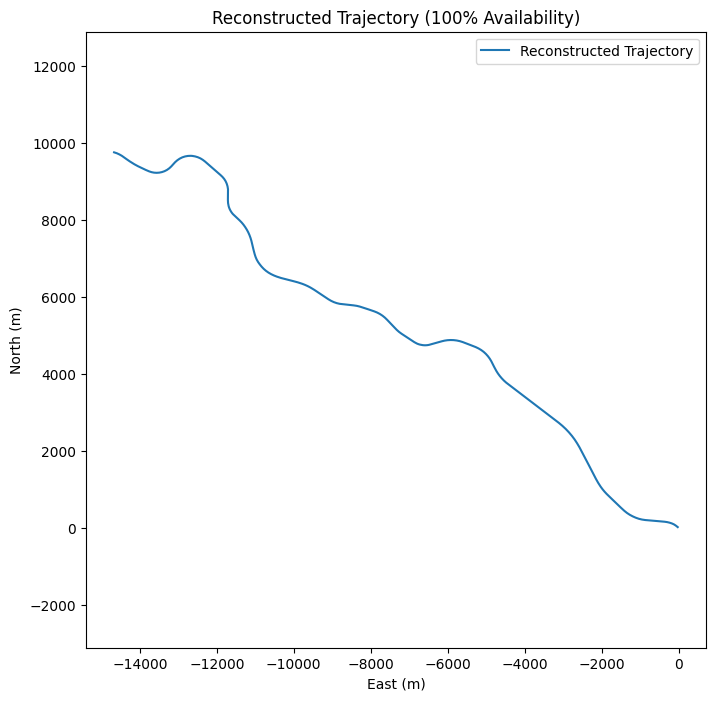

In [51]:
def integrate_trajectory(epochs, positions, accelerations):
    dts = epochs.diff().fillna(0).values  # Time deltas, first one zero
    out = []

    for i, (dt, pos, accel) in enumerate(zip(dts, positions, accelerations)):
        if i == 0:
            # First point: just use position as is
            out.append(pos)
        elif math.isnan(pos):
            if i == 1:
                # For second point with NaN, assume zero velocity at start
                velocity = accel * dt
                position = out[-1] + velocity * dt
            else:
                prev_velocity = (out[-1] - out[-2]) / dt
                velocity = prev_velocity + accel * dt
                position = out[-1] + velocity * dt
            out.append(position)
        else:
            out.append(pos)

    return out

# Load the data
df = pd.read_csv('trajectory.csv')

# Extract columns
epochs = df['time']
east = df['position_east(m)']
north = df['position_north(m)']
accel_east = df['acceleration_east(m/s2)']
accel_north = df['acceleration_north(m/s2)']

# Reconstruct trajectories using the integrate_trajectory function
reconstructed_east = integrate_trajectory(epochs, east, accel_east)
reconstructed_north = integrate_trajectory(epochs, north, accel_north)

# Plot reconstructed trajectory
plt.figure(figsize=(8, 8))
plt.plot(reconstructed_east, reconstructed_north, label='Reconstructed Trajectory')
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.title('Reconstructed Trajectory (100% Availability)')
plt.legend()
plt.axis('equal')
plt.show()

Answer the following questions:

1. Have a look at the method `integrate_trajectory` and briefly describe what it does
1. Plot the acceleration in one of the components. Do we have gaps in this magnitude? Which is the **availability** of the acceleration?
1. Compute the velocity at each point and plot it.
1. Reconstruct (integrate) the trajectory with gaps to achieve 100% availability. Tip: use the `integrate_trajectory` method

**Exercise 4: Trajectory reconstruction with biased accelerations**

One of the main problems of IMU are the biases of the sensors, that need to be corrected during integration, otherwise
the trajectory will be wrong as the errors accumulate in time.

To check this effect, create two new acceleration time series with a constant bias of $0.1 m/s^2$ for the East component and $0.2 m/s^2$ for the North component. Repeat the steps 2 and 4 of Exercise 3 and describe what do you see in the resulting plot (and the reason why)

Columns in the dataset: ['time', 'position_east(m)', 'position_north(m)', 'acceleration_east(m/s2)', 'acceleration_north(m/s2)']


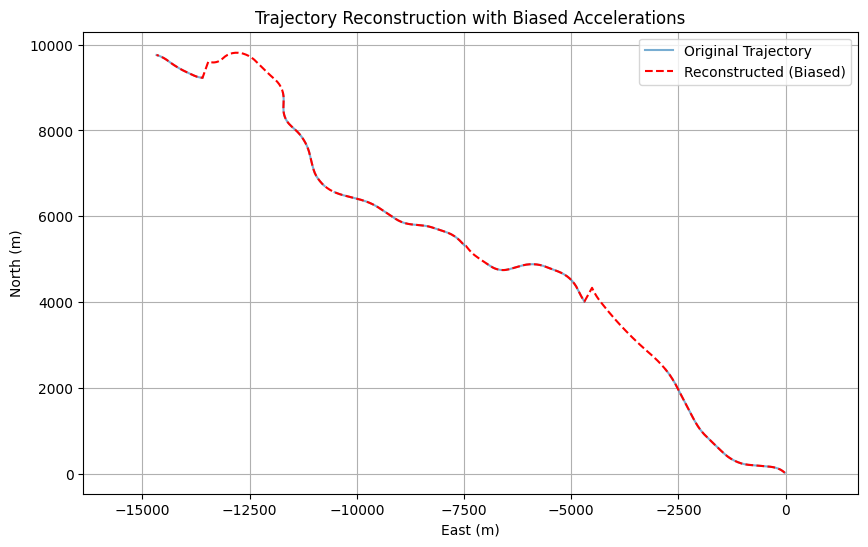

In [69]:
# Load the dataset
df = pd.read_csv("trajectory.csv")

# Print actual column names to verify structure
print("Columns in the dataset:", df.columns.tolist())

# Detect columns automatically (fallback if you don't want to hardcode)
time_col = [col for col in df.columns if "time" in col.lower()][0]
pos_east_col = [col for col in df.columns if "position_east" in col.lower()][0]
pos_north_col = [col for col in df.columns if "position_north" in col.lower()][0]
acc_east_col = [col for col in df.columns if "acceleration_east" in col.lower()][0]
acc_north_col = [col for col in df.columns if "acceleration_north" in col.lower()][0]

# Add constant bias to acceleration values
df_biased = df.copy()
df_biased[acc_east_col] = df_biased[acc_east_col] + 0.1  # bias in east
df_biased[acc_north_col] = df_biased[acc_north_col] + 0.2  # bias in north

# Integration function to fill missing trajectory
def integrate_trajectory(time, pos_east, pos_north, acc_east, acc_north):
    vel_east = np.zeros_like(pos_east)
    vel_north = np.zeros_like(pos_north)
    pos_east_filled = pos_east.copy()
    pos_north_filled = pos_north.copy()
    dt = np.mean(np.diff(time))

    for i in range(1, len(time)):
        if np.isnan(pos_east_filled[i]) or np.isnan(pos_north_filled[i]):
            vel_east[i] = vel_east[i - 1] + acc_east[i - 1] * dt
            vel_north[i] = vel_north[i - 1] + acc_north[i - 1] * dt
            pos_east_filled[i] = pos_east_filled[i - 1] + vel_east[i] * dt
            pos_north_filled[i] = pos_north_filled[i - 1] + vel_north[i] * dt
        else:
            vel_east[i] = (pos_east_filled[i] - pos_east_filled[i - 1]) / dt
            vel_north[i] = (pos_north_filled[i] - pos_north_filled[i - 1]) / dt

    return pos_east_filled, pos_north_filled

# Reconstruct the trajectory using biased accelerations
reconstructed_east, reconstructed_north = integrate_trajectory(
    df_biased[time_col].values,
    df_biased[pos_east_col].values,
    df_biased[pos_north_col].values,
    df_biased[acc_east_col].values,
    df_biased[acc_north_col].values
)

# Plot the original vs reconstructed trajectory
plt.figure(figsize=(10, 6))
plt.plot(df[pos_east_col], df[pos_north_col], label="Original Trajectory", alpha=0.6)
plt.plot(reconstructed_east, reconstructed_north, label="Reconstructed (Biased)", linestyle='--', color='red')
plt.xlabel("East (m)")
plt.ylabel("North (m)")
plt.title("Trajectory Reconstruction with Biased Accelerations")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()